### Olympic Games athletes data



Question 1 - Removing Outliers and bad data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd
import ipywidgets as widgets

In [2]:
df_athletes = pd.read_csv("./athlete_events.csv")

## Question 3.1

The cell below implements a method to determine the outliers in the dataset. The method implemented is the 1.5*IQR method. The method describes an outlier as a datapoint that is 1.5 times the IQR less than Q1, the 25 percentile, and 1.5 times the IQR greater than Q3, the 75th percentile. Outliers are computed separately for male and female and then merged together again. The separate computation of outliers for males and females was done to better visualize the specific outliers for each gender.

In [21]:
#FIltering the data for male and female
male_data = df_athletes[df_athletes['Sex'] == 'M']
female_data = df_athletes[df_athletes['Sex'] == 'F']

#Computing the quantile values for weight for each gender
Q1_male = male_data['Weight'].quantile(0.25)
Q3_male = male_data['Weight'].quantile(0.75)
Q1_female = female_data['Weight'].quantile(0.25)
Q3_female = female_data['Weight'].quantile(0.75)

#Computing the interquantile range for weight for each gender
IQR_male = Q3_male - Q1_male
range_value_male = 1.5 * IQR_male

IQR_female = Q3_female - Q1_female
range_value_female = 1.5 * IQR_female

#Computing the quantile values for height for each gender
Q1_male_height = male_data['Height'].quantile(0.25)
Q3_male_height = male_data['Height'].quantile(0.75)
Q1_female_height = female_data['Height'].quantile(0.25)
Q3_female_height = female_data['Height'].quantile(0.75)

#Computing the interquantile range for height for each gender
IQR_male_height = Q3_male_height - Q1_male_height
range_value_male_height = 1.5 * IQR_male_height

IQR_female_height = Q3_female_height - Q1_female_height
range_value_female_height = 1.5 * IQR_female_height

#FIltering out the datapoints that lie below and above the set values
#Be left with the values that lie within the accepted range and therefore remove any outliers
male_data = male_data[(male_data['Weight'] >= Q1_male - range_value_male) & (male_data['Weight'] <= Q3_male + range_value_male) & (male_data['Height'] >= Q1_male_height - range_value_male_height) & (male_data['Height'] <= Q3_male_height + range_value_male_height)]
female_data = female_data[(female_data['Weight'] >= Q1_female - range_value_female) & (female_data['Weight'] <= Q3_female + range_value_female) & (female_data['Height'] >= Q1_female_height - range_value_female_height) & (female_data['Height'] <= Q3_female_height + range_value_female_height)]

#merging all the data
filtered_weights_heights = pd.concat([male_data,female_data])

The cell below plots a box plot of the weight data prior to the filtering out of outliers. It can be seen that there is a wide range of values and a number of possible outliers lying far away for the median and 75th percentile

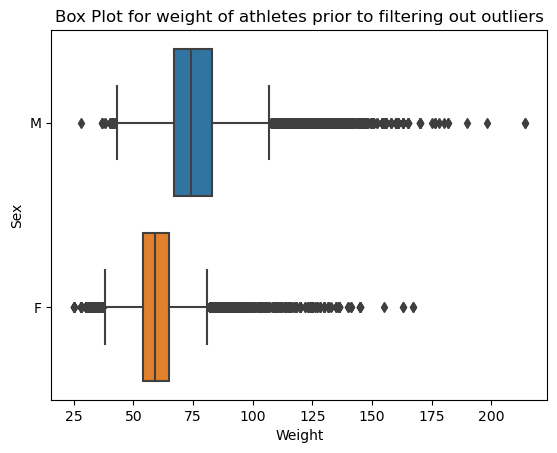

In [29]:
sns.boxplot(x='Weight',y='Sex', data=df_athletes)
plt.title('Box Plot for weight of athletes prior to filtering out outliers')
plt.show()

The cell below plots a box plot of the weight data after the outliers have been removed. It now can be seen that there is a tight distribution of weight and that datapoints lying outside the 25th and 75th percentile are very close to these percentiles.

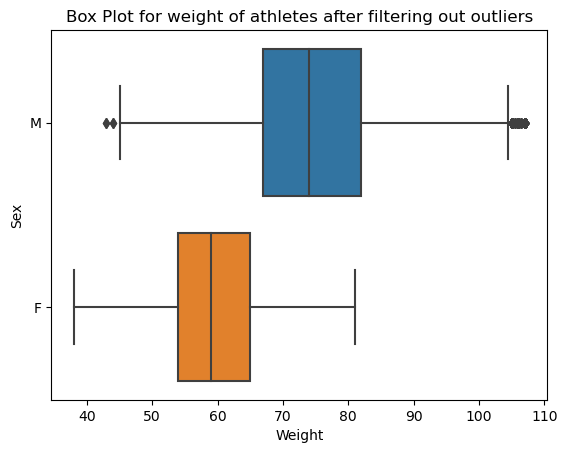

In [30]:
sns.boxplot(x='Weight',y='Sex', data=filtered_weights_heights)
plt.title('Box Plot for weight of athletes after filtering out outliers')
plt.show()

The cell below plots a box plot of the height data prior to the filtering out of outliers. It can be seen that there is a wide range of values and a large number of possible outliers lying far away for the median and 75th percentile

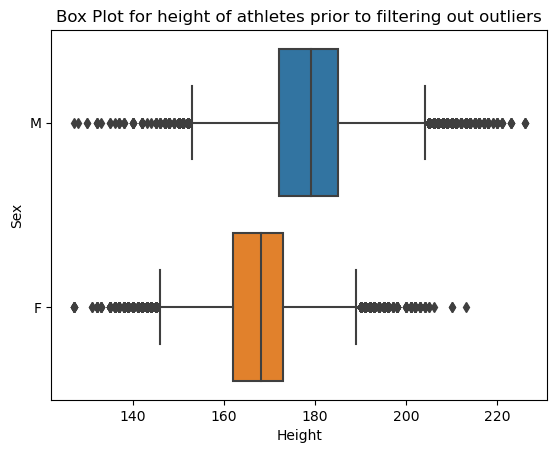

In [31]:
sns.boxplot(x='Height',y='Sex', data=df_athletes)
plt.title('Box Plot for height of athletes prior to filtering out outliers')
plt.show()

The cell below plots the boxplot of the height data after the outliers have been removed. It can be seen that there are now no datapoint values lying outside of the 25th and 75th percentile. Indicating a tight range of datapoints with no outliers

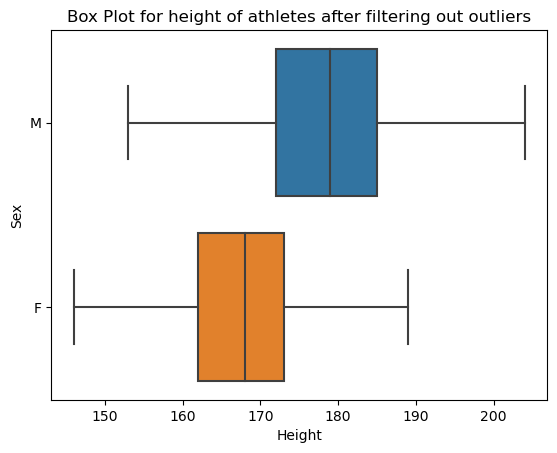

In [32]:
sns.boxplot(x='Height',y='Sex', data=filtered_weights_heights)
plt.title('Box Plot for height of athletes after filtering out outliers')
plt.show()

The cell below does a check to see if any countries, NOC, in the dataset do not exist. It does this by comparing with the NOC values in the country definitions file. A set is created of all the NOC values from the athletes dataset and then a set of all the NOC values is created from the country definitions file, creating a list on unique values, and the difference between these two sets is computed. This set difference will indicate any elements that are in the athletes events dataset and not the country defintions. The only element to not appear in the country definitions file but in the athletes events dataset is SGP. Upon inspection of the athlete events dataset, SIN represents Singapore. In the country definitions Singapore is represented as SIN not SGP. However, seeing as Singapore exists this difference in NOC does not indicate that any NOC values, and therefore any countries dont exist.

In [64]:
country_definitions = pd.read_csv("./country_definitions.csv")

unique_values_df1 = set(df_athletes['NOC'])

unique_values_df2 = set(country_definitions['NOC'])

elements_not_in_set2 = unique_values_df1.difference(unique_values_df2)

if elements_not_in_set2:
    print("The following elements in set1 are not in set2:", elements_not_in_set2)
else:
    print("All elements in set1 are also in set2.")
    

The following elements in set1 are not in set2: {'SGP'}


A decision was made to use the dataset that includes all the outliers that were previously visualised and filtered out. It was seen that the outlier values for weight and height were all humanly possible and did not indicate any imaginary or non real people. Therefore removing them would result in a huge loss of valuable information and would not result in the most comprehensive and accurate data analysis and visualization.

## Question 3.2 (a)
The cell below calculates the number of gold, silver and bronze medals for every country and the total number of participants in each country.

In [20]:
#FIlter the dataframe into only inlcuding the athletes who obtained either a gold,silver or bronze
medal_counts = df_athletes[df_athletes['Medal'].isin(['Gold', 'Silver', 'Bronze'])]
#Group data by NOC and Medal and create new columns for each medal type
medal_counts = medal_counts.groupby(['NOC', 'Medal']).size().unstack(fill_value=0)

#Calculates the total number of participants for each country
participation_counts = df_athletes.groupby('NOC').size().rename('Total_Participations').reset_index()
#Create new dataframe by combining the medal counts and total participations
country_total_medals_stats_df = pd.merge(medal_counts, participation_counts, on='NOC', how='left').fillna(0)



## 3.2 (b)

The cell below calculates columns for the mean, maximum and minimum weights and heights and fraction
of athletes of each gender

In [21]:
#Calculate mean weight for each country
#The agg function is used for aggregating the data by a specific function, for example the mean
mean_weight_height = df_athletes.groupby('NOC').agg({'Weight': 'mean', 'Height': 'mean'}).reset_index()
mean_weight_height.columns = ['NOC', 'Mean_Weight', 'Mean_Height']

# Calculating min and max values for weight and height for each country
min_max_weight_height = df_athletes.groupby('NOC').agg({'Weight': ['min', 'max'], 'Height': ['min', 'max']}).reset_index()
min_max_weight_height.columns = ['NOC', 'Min_Weight', 'Max_Weight', 'Min_Height', 'Max_Height']

#Calculating fraction for each gender
gender_fraction = df_athletes.groupby(['NOC', 'Sex'])['Name'].count().unstack(fill_value=0)
gender_fraction['Male_Fraction'] = gender_fraction['M'] / (gender_fraction['M'] + gender_fraction['F'])
gender_fraction['Female_Fraction'] = gender_fraction['F'] / (gender_fraction['M'] + gender_fraction['F'])
gender_fraction = gender_fraction.reset_index()

#Combine mean,max and min values with fraction of each gender
country_descriptive_stats_df = pd.merge(mean_weight_height, min_max_weight_height, on='NOC', how='left')
country_descriptive_stats_df = pd.merge(country_descriptive_stats_df, gender_fraction[['NOC', 'Male_Fraction', 'Female_Fraction']], on='NOC', how='left')


## 3.2 (c)

The cell below calculates the number of sports each country has medaled and participated in

In [22]:
#Filter dataframe to create unique combinations of countries and the sports they participated in
country_sport_unique = df_athletes[['NOC', 'Sport']].drop_duplicates()

#The number of sports each country has participated in
participated_sports = country_sport_unique.groupby('NOC')['Sport'].count().reset_index()
participated_sports.columns = ['NOC', 'Participated_Sports']


#Calculating the number of unique sports each country has medaled in
medal_df = df_athletes[df_athletes['Medal'].notna()]
country_sport_medal_unique = medal_df[['NOC', 'Sport']].drop_duplicates()
medaled_sports = country_sport_medal_unique.groupby('NOC')['Sport'].count().reset_index()
medaled_sports.columns = ['NOC', 'Medaled_Sports']


country_medaled_sport_stats_df = pd.merge(participated_sports, medaled_sports, on='NOC', how='left').fillna(0)




The cell below combines the above three dataframes into one and creating the new csv file, countries.csv

In [48]:
temp_full_country_df = pd.merge(country_total_medals_stats_df,country_descriptive_stats_df, on='NOC', how='left').fillna(0)
full_country_df = pd.merge(temp_full_country_df,country_medaled_sport_stats_df, on='NOC', how='left').fillna(0)

After inspection of the country definitions file it can be seen that there are three distinct NOC values for Russia. Therefore the cell below identifies each of them, accumulates tham all into the one NOC values, RUS, and removes the other NOV value rows.

In [49]:
rus = full_country_df[full_country_df['NOC'] == 'RUS']
eun = full_country_df[full_country_df['NOC'] == 'EUN']
urs = full_country_df[full_country_df['NOC'] == 'URS']


combined_row = rus.append(eun).append(urs).sum()
combined_row['NOC'] = 'RUS'
full_country_df = full_country_df.drop(full_country_df[full_country_df['NOC'].isin(['RUS', 'EUN', 'URS'])].index)
full_country_df = full_country_df.append(combined_row, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_28900\85455082.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_row = rus.append(eun).append(urs).sum()
C:\Users\DELL\AppData\Local\Temp\ipykernel_28900\85455082.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_row = rus.append(eun).append(urs).sum()
C:\Users\DELL\AppData\Local\Temp\ipykernel_28900\85455082.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_country_df = full_country_df.append(combined_row, ignore_index=True)


In [50]:
full_country_df.to_csv("countries.csv",index=False)

The cell below shows a number of datapoints in the countries.csv file

In [51]:
countries_data = pd.read_csv('./countries.csv')
countries_data.head()

,NOC,Bronze,Gold,Silver,Total_Participations,Mean_Weight,Mean_Height,Min_Weight,Max_Weight,Min_Height,Max_Height,Male_Fraction,Female_Fraction,Participated_Sports,Medaled_Sports
0,AFG,2,0,0,126,65.901639,170.592593,48.0,111.0,156.0,186.0,0.960317,0.039683,7,1.0
1,AHO,0,0,1,79,76.176471,177.294118,52.0,120.0,152.0,193.0,0.848101,0.151899,13,1.0
2,ALG,8,5,4,551,68.693252,174.702869,45.0,125.0,146.0,200.0,0.829401,0.170599,22,3.0
3,ANZ,5,20,4,86,70.181818,176.730769,62.0,85.0,167.0,189.0,0.976744,0.023256,8,5.0
4,ARG,91,91,92,3297,73.997320,176.604722,43.0,140.0,150.0,210.0,0.804974,0.195026,42,18.0


The cells below use the shape file to visualize how many of each medal type each country
has won. The shape file is used in conjunction with, and is more of a collection of, three necessary files. The three files have the extensions, .shp, .shx and .dbf. The .shp file describes the geometry of features, the .shx stores the index for the feature geometry and the .dbf file holds the attributes for each shape. 

The collection of these files creates a map visualisation with certain boundries that represent certain regions. In this specific case the boundries represent country borders and the regions are the countries that have participated or medaled, at least once, at the Olympic Games. 

The first map visualisation, created by the cell below, displays the number of gold medals won by each country. The medal count is represented as a heatmap, where the lower the count, the more dark red the colour is and as the count increases the colour turns yellow and then becomes blue. It can be seen that the USA and Russia have the highest count of gold medals, by a substantial margin, over the history of the Olympic games. Russia does have slightly less than the USA but still much higher than all other countries. Most South American, African and Middle Eastern countries have a low gold medal count, indicated by the dark red colour these states are represented by. Canada and Australia are a lighter shade of red inidcating a higher gold medal count compared to the aforementioned dark red countries. The United Kingdom and some other smaller European countries are tending towards yellow and is a light orange, indicating a higher gold medal count than the previously two mentioned countries. China possess similar shades of red to Canada and Australia.



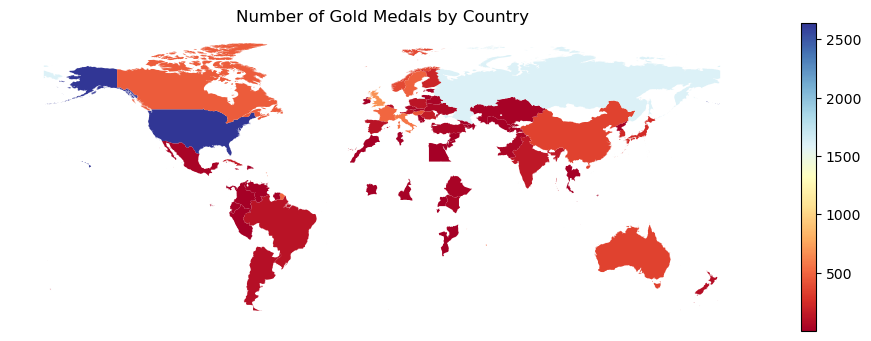

In [52]:
#Reading in the shape file using geopandas
gdf = gpd.read_file("./ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")

#Merging these files based on NOC
merged_data = gdf.merge(countries_data, left_on='ADM0_A3', right_on='NOC', how='left')

#FIltering the data to only include countires that have at least one gold medal
filtered_data = merged_data[merged_data['Gold']>0]

#DIsplaying the visualisation
ax = filtered_data.plot(column='Gold', cmap='RdYlBu', legend=True, legend_kwds={'shrink': 0.5}, figsize=(12, 8))
ax.axis("off")
plt.title('Number of Gold Medals by Country')
plt.show()




The second map visualisation, created by the cell below, displays the number of silver medals won by each country. The same trend as the previous map visualisation is evdient here with the USA and Russia having the vast majority of silver medals and heavily outnumbering all other countries. Canada and Australia again have similar numbers of silver medals that are more then that of China but less than that of the United Kingdom. While the African, South American and Middle Eastern countries all possess low silver medal counts and are all dark red. Overall, the dark colours are all lighter while the dark blue is darker. The dark reds tend toward light red, the reds tend toward organge, orange tend toward yellow, yellow towards light blue and blue towards a darker blue. This is all due to the fact that the number of silver medals, for most countries, is higher than that of golds. This is the case as gold medals are harder to achieve than silver medals.

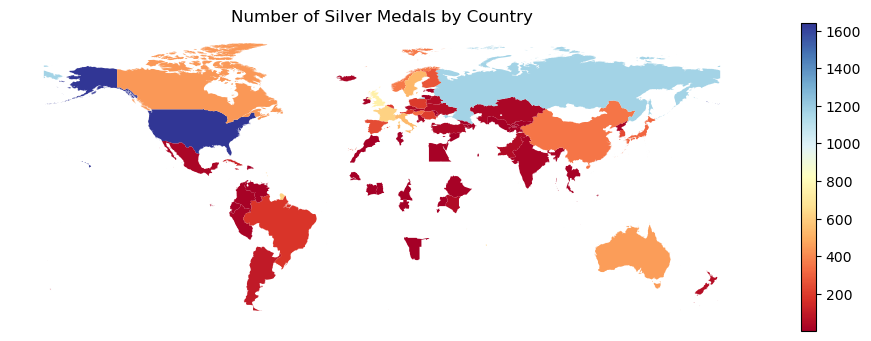

In [34]:

merged_data = gdf.merge(countries_data, left_on='ADM0_A3', right_on='NOC', how='left')

filtered_data = merged_data[merged_data['Silver']>0]

ax = filtered_data.plot(column='Silver', cmap='RdYlBu', legend=True, legend_kwds={'shrink': 0.5}, figsize=(12, 8))

ax.axis("off")

plt.title('Number of Silver Medals by Country')
plt.show()




The third map visualisation, created by the cell below, displays the number of bronze medals won by each country. The same trend as the previous two map visualisation is evident here with the USA and Russia dominating the bronze medal count. Canada and Australia again have similar numbers of bronze medals that are more then that of China but less than that of the United Kingdom. While the African, South American and Middle Eastern countries all possess lower bronze medal counts and are all red. Again here all the dark reds, reds, oranges and yellows are lighter while the dark blue is darker. This is again the case as the bronze medal is the most obtainable of the three medals.

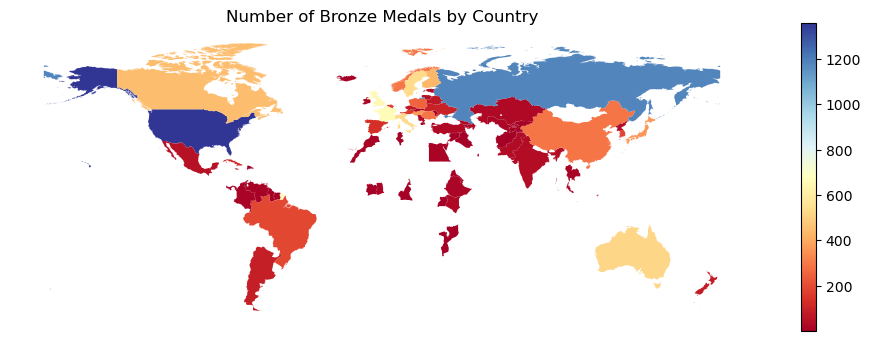

In [35]:
merged_data = gdf.merge(countries_data, left_on='ADM0_A3', right_on='NOC', how='left')

filtered_data = merged_data[merged_data['Bronze']>0]

ax = filtered_data.plot(column='Bronze', cmap='RdYlBu', legend=True, legend_kwds={'shrink': 0.5}, figsize=(12, 8))

ax.axis("off")

plt.title('Number of Bronze Medals by Country')
plt.show()




The fourth map visualisation, created by the cell below, displays the number of sports each country has won any medal in. It can be seen that Russia has medaled in the most sports out of all countries, including the USA. USA have the second highest of sports medaled in. The African countires are the darkest red, indicating that they have medaled in the fewest countries. The United Kingdom appears to have the thirs highest count of medaled sports, or even equal to the of the USA. These three countries are then followed by Canada, China, Australia, certain European countries and most Southern American countires.

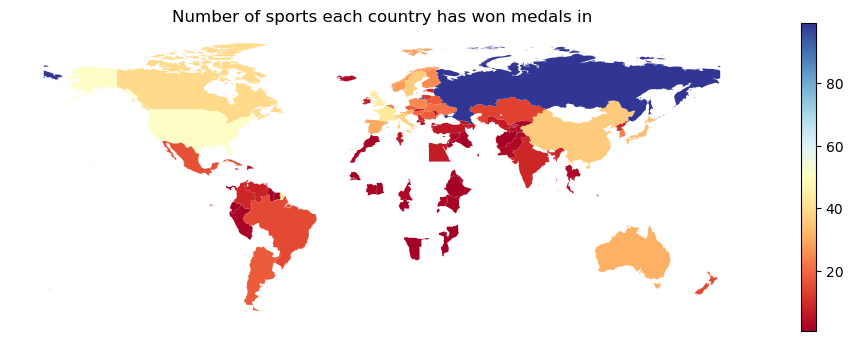

In [53]:
merged_data = gdf.merge(countries_data, left_on='ADM0_A3', right_on='NOC', how='left')

filtered_data = merged_data[merged_data['Medaled_Sports']>0]

ax = filtered_data.plot(column='Medaled_Sports', cmap='RdYlBu', legend=True, legend_kwds={'shrink': 0.5}, figsize=(12, 8))

ax.axis("off")

plt.title('Number of sports each country has won medals in')
plt.show()




The final map visualisation, created by the cell below, displays the number of sports each country has participated in. As expected the map follows a similar trend to the previous map visualisation, with Russia possessing the highest count and followed by the USA and the UK, but with colours that indicate higher counts for each country. This is expected as the number of sports participated in will be higher than that of sports medaled in.

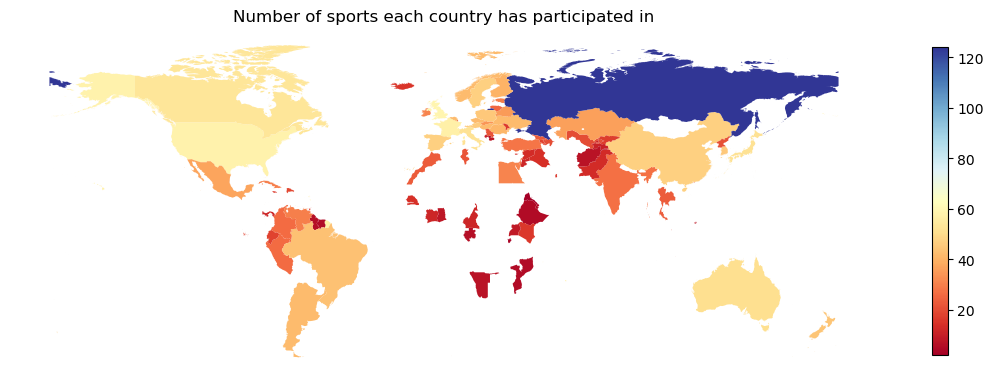

In [54]:
merged_data = gdf.merge(countries_data, left_on='ADM0_A3', right_on='NOC', how='left')

filtered_data = merged_data[merged_data['Participated_Sports']>0]

ax = filtered_data.plot(column='Participated_Sports', cmap='RdYlBu', legend=True, legend_kwds={'shrink': 0.5}, figsize=(14, 8))

ax.axis("off")

plt.title('Number of sports each country has participated in')
plt.show()




With reference to the above map visualisations, it is evident that certain countries, consistently attain more medals, whether they are gold, silver or bronze, participate in more sports and medal in more sports. For example the USA and Russia boast the greatest number of each type of medal, the number of sports they medalled in and the number of sports participated in. Whereas countries within Africa like Namibia and Mozambique consistently perform the worst. In theory, these trends can be explained by the infastructure within these countries. The USA, being possibly the most influential country in the world, is a first world country with massive infastructure avaliable for sports within the country. From facilities, to equipment to funding. The USA athletes always have the infustructure and funding to train and compete to the best of their abilities, regardless of travel or any other inhibiting factor. In contrast, countries like Namibia, Mozambique or Ethiopia, do not have the infastructure and funding to support and rear many world class athletes. 

### Question 3.3

The cell below computes the number of gold,silver, and bronze medals for each sport and the total number of participating countries for every sport

In [82]:
#FIlter the dataframe into only inlcuding the athletes who obtained either a gold,silver or bronze
medal_counts_sport = df_athletes[df_athletes['Medal'].isin(['Gold', 'Silver', 'Bronze'])]
#Groups data by Sport and Medal and creates new columns for each medal type
medal_counts_sport = medal_counts_sport.groupby(['Sport', 'Medal']).size().unstack(fill_value=0)

#Calculates the total number of countries for each sport
participation_counts_sport = df_athletes.groupby('Sport').size().rename('Total_Participations').reset_index()
#Create new dataframe by combining the medal counts and total participating countries
sport_total_medals_stats_df = pd.merge(medal_counts_sport, participation_counts_sport, on='Sport', how='left').fillna(0)




The cell below computes the mean weight, height and age for each sport. In addition it calculates the minimum and maximum for weight, height and age

In [83]:
#Calculate mean weight, height and age for each sport
mean_weight_height_age_sport = df_athletes.groupby('Sport').agg({'Weight': 'mean', 'Height': 'mean', 'Age': 'mean'}).reset_index()
mean_weight_height_age_sport.columns = ['Sport', 'Mean_Weight', 'Mean_Height', 'Mean_age']

#Calculate min and max values for weight, height, age for each sport
min_max_weight_height_age_sport = df_athletes.groupby('Sport').agg({'Weight': ['min', 'max'], 'Height': ['min', 'max'], 'Age': ['min', 'max']}).reset_index()
min_max_weight_height_age_sport.columns = ['Sport', 'Min_Weight', 'Max_Weight', 'Min_Height', 'Max_Height', 'Min_Age', 'Max_Age']


#Combine mean,max and min values 
sport_descriptive_stats_df = pd.merge(mean_weight_height_age_sport, min_max_weight_height_age_sport, on='Sport', how='left')



The cell below computes the number of countries that have medaled and participated in each sport

In [174]:
#Filter dataframe to create unique combinations of countries and the sports they participated in
sport_country_unique = df_athletes[['Sport', 'NOC']].drop_duplicates()

#The number of sports each country has participated in
participated_countries = sport_country_unique.groupby('Sport')['NOC'].count().reset_index()
participated_countries.columns = ['Sport', 'Participating_Countries']


#Calculating the number of countries that have medaled in a sport
medal_df = df_athletes[df_athletes['Medal'].notna()]
sport_country_medal_unique = medal_df[['Sport', 'NOC']].drop_duplicates()
medaled_countries_sports = sport_country_medal_unique.groupby('Sport')['NOC'].count().reset_index()
medaled_countries_sports.columns = ['Sport', 'Countries_Medaled']


sport_medaled_country_stats_df = pd.merge(participated_countries, medaled_countries_sports, on='Sport', how='left').fillna(0)





The cell below combines the above three dataframes into a single dataframe and then csv file

In [58]:
temp_full_sport_df = pd.merge(sport_total_medals_stats_df,sport_descriptive_stats_df, on='Sport', how='left').fillna(0)
full_sport_df = pd.merge(temp_full_sport_df,sport_medaled_country_stats_df, on='Sport', how='left').fillna(0)

full_sport_df.to_csv("events.csv",index=False)

In [55]:
events_df = pd.read_csv("./events.csv")

### Question 3.3 (a)
The cell below plots the mean weight and height for each sport as a bar graph. It can be seen some sports have lower or higher mean weights and heights. Each sport requires an athlete of a specific body type, an optimal weight and height. Sports like weightlifting will require the athletes to be much heavier than athletes competing in gymnastics. Weightlifting require athletes to be heavy as this can increase the amount of weight each lifter can lift, which is the goal of weightlifting. Whereas gymnastics requires athletes to be light and flexible in order to complete the various events within the sport. The varying weights, like weightlifting and gymnastics can be seen within the graph below. In addition to weight, height is of significance and plays a role in each sport. Athletes who compete in basketball have a higher average height than those who compete in rythmic gymnastics. This is the case as being of a great height is extremely beneficial in basketball and being of a small height is advantageous in rythmic gymnastics. The differences in average height can be seen in the graph below, with the specific example of basketball and rythmic gymnastics being evident. In addition the mean weight compared to the mean height, of each sport, appears to be consistently directly proportional. As when the mean heaight decreases the mean weight will also decrease and the same for when either one increases. This is intutive as the greater the height the greater the weight generally is.  The Pearson Correlation Coefficient is calculted and shows a strong positive linear correlation. This means that as one increases, the other tends to increase as well, therefore the relationship is quite strong.

In [59]:
correlation = events_df['Mean_Weight'].corr(events_df['Mean_Height'])

print(f"Pearson Correlation Coefficient: {correlation}")

Pearson Correlation Coefficient: 0.7946021529445274


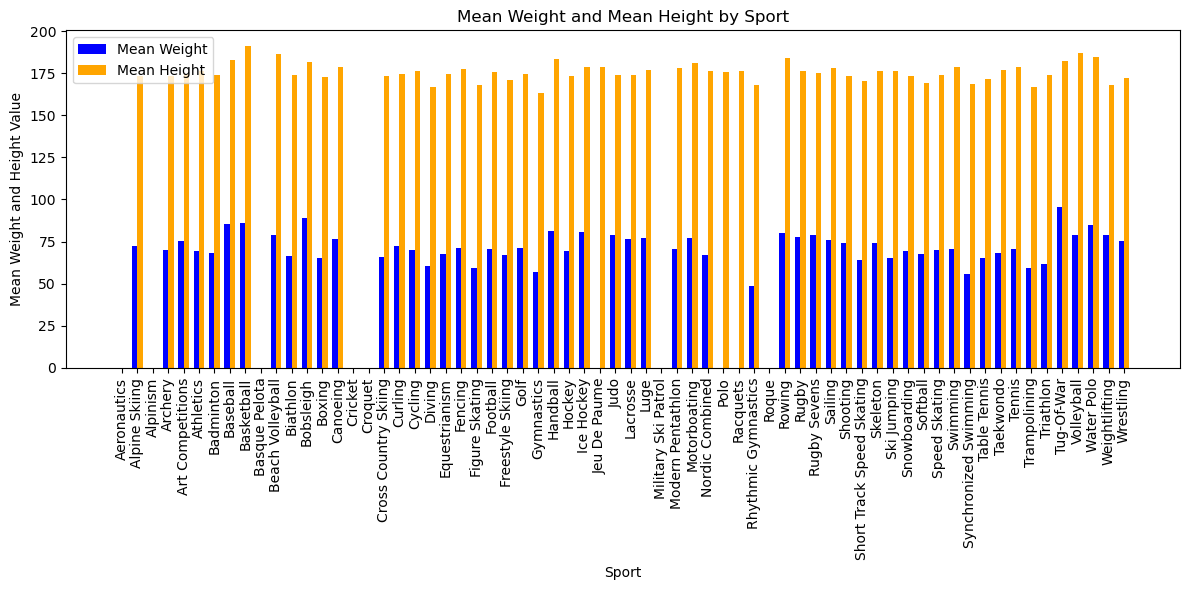

In [65]:
sports = events_df['Sport']
x = np.arange(len(sports))
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, events_df['Mean_Weight'], width, label='Mean Weight', color='blue')
bar2 = ax.bar(x + width/2, events_df['Mean_Height'], width, label='Mean Height', color='orange')
ax.set_xticks(x)
ax.set_xticklabels(sports, rotation=90)
ax.set_xlabel('Sport')
ax.set_ylabel('Mean Weight and Height Value')
ax.set_title('Mean Weight and Mean Height by Sport')
ax.legend()
plt.tight_layout()
plt.show()

The cell below just plots the mean weight of all sports

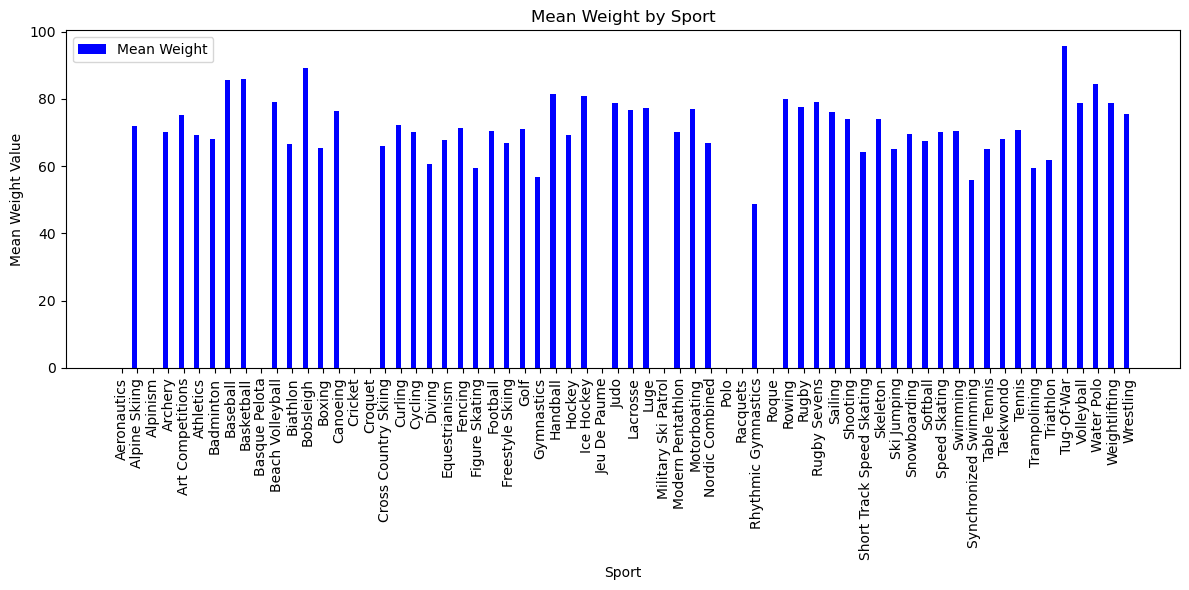

In [66]:
sports = events_df['Sport']
x = np.arange(len(sports))
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, events_df['Mean_Weight'], width, label='Mean Weight', color='blue')
ax.set_xticks(x)
ax.set_xticklabels(sports, rotation=90)
ax.set_xlabel('Sport')
ax.set_ylabel('Mean Weight Value')
ax.set_title('Mean Weight by Sport')
ax.legend()
plt.tight_layout()
plt.show()

The cell below plots the mean height of all the sports

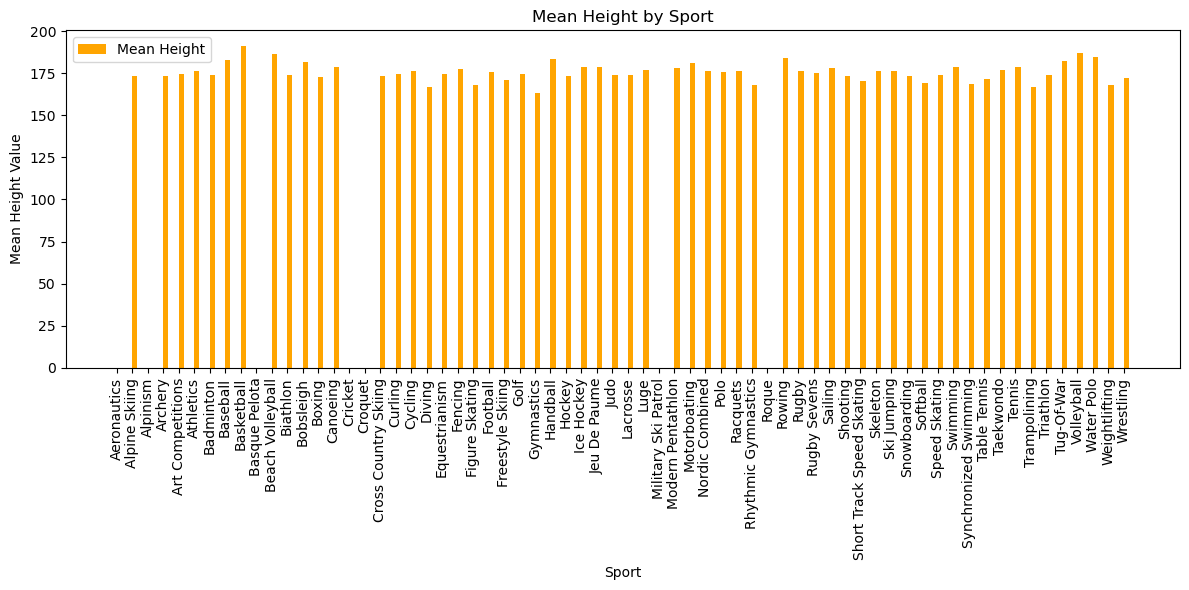

In [67]:
sports = events_df['Sport']
x = np.arange(len(sports))
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 6))
bar2 = ax.bar(x + width/2, events_df['Mean_Height'], width, label='Mean Height', color='orange')
ax.set_xticks(x)
ax.set_xticklabels(sports, rotation=90)
ax.set_xlabel('Sport')
ax.set_ylabel('Mean Height Value')
ax.set_title('Mean Height by Sport')
ax.legend()
plt.tight_layout()
plt.show()

The cell below plots the mean weight against the mean age of all the sports. It can be seen that almost all of the mean ages fall between 20 and 40 years of age. With most tending more towards 20. This is expected as athletes generally perform more optimally at a younger age, around 20-35, due to the physical nature and capabilities of their bodies. It can be noticed that most the mean ages are of similar magnitude, as stated above. With the exception of art competitions and roque. These sports do not require as much physical capabilities as the other sports, like swimming, and therefore the mean age is higher. For Olympic athletes the mean weight and mean age is not strongly correlated, as indicated by the Pearson correlation coefficient. There is a  moderate negative correlation. As one column increases, the other tends to decrease, but the relationship is not very strong.

In [58]:
correlation = events_df['Mean_Weight'].corr(events_df['Mean_age'])

print(f"Pearson Correlation Coefficient: {correlation}")

Pearson Correlation Coefficient: -0.33885926930527366


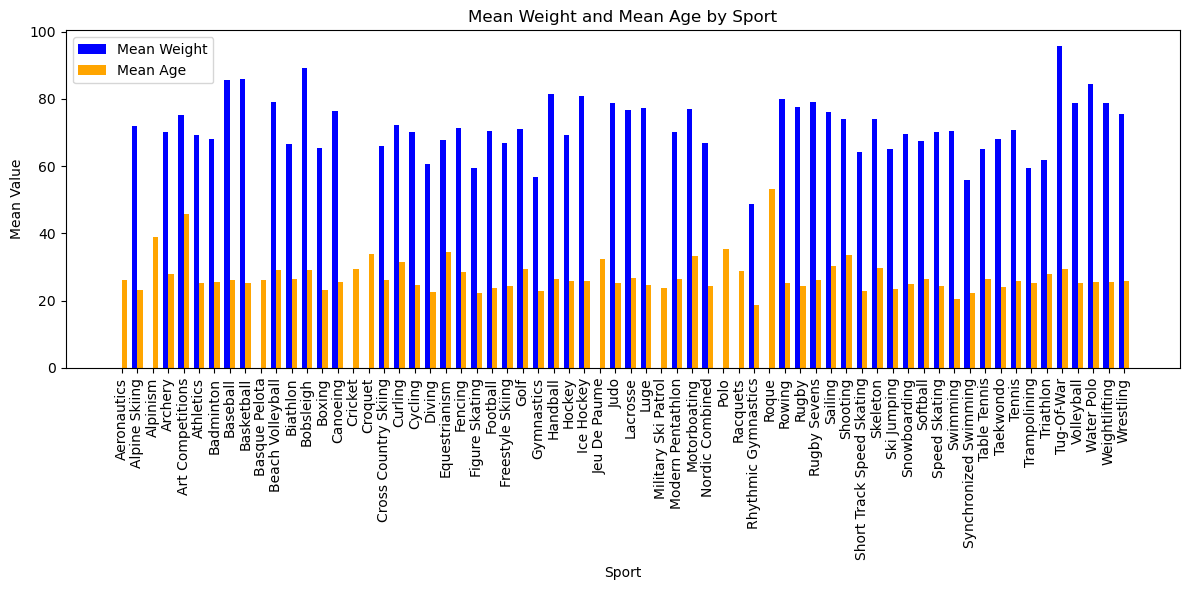

In [69]:
sports = events_df['Sport']
x = np.arange(len(sports))
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, events_df['Mean_Weight'], width, label='Mean Weight', color='blue')
bar2 = ax.bar(x + width/2, events_df['Mean_age'], width, label='Mean Age', color='orange')
ax.set_xticks(x)
ax.set_xticklabels(sports, rotation=90)
ax.set_xlabel('Sport')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Weight and Mean Age by Sport')
ax.legend()
plt.tight_layout()
plt.show()

The cell below plots just the mean age acorss all the sports

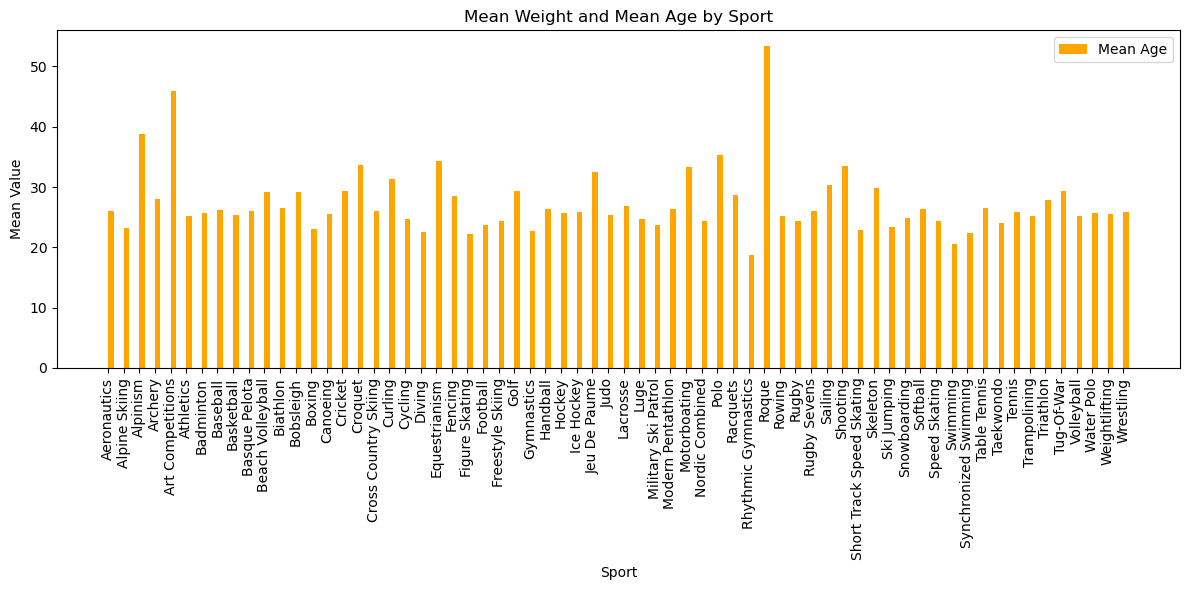

In [70]:
sports = events_df['Sport']
x = np.arange(len(sports))
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 6))
bar2 = ax.bar(x + width/2, events_df['Mean_age'], width, label='Mean Age', color='orange')
ax.set_xticks(x)
ax.set_xticklabels(sports, rotation=90)
ax.set_xlabel('Sport')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Weight and Mean Age by Sport')
ax.legend()
plt.tight_layout()
plt.show()

The cell below plots the mean height against the mean age across all the sports. The mean age and mean height have been previously discussed. There is no apparent strong correlation between mean age and mean height. The one can increase where the other decreases or vice versa and both can increase and decrease at the same time. The Pearson correlation is computed and is very similar to the Pearson correlation coefficient for the mean age and mean weight. It shows a moderate negative correlation. As one column increases, the other tends to decrease, but the relationship is not very strong.

In [57]:
correlation = events_df['Mean_Height'].corr(events_df['Mean_age'])

print(f"Pearson Correlation Coefficient: {correlation}")

Pearson Correlation Coefficient: -0.3493389951792801


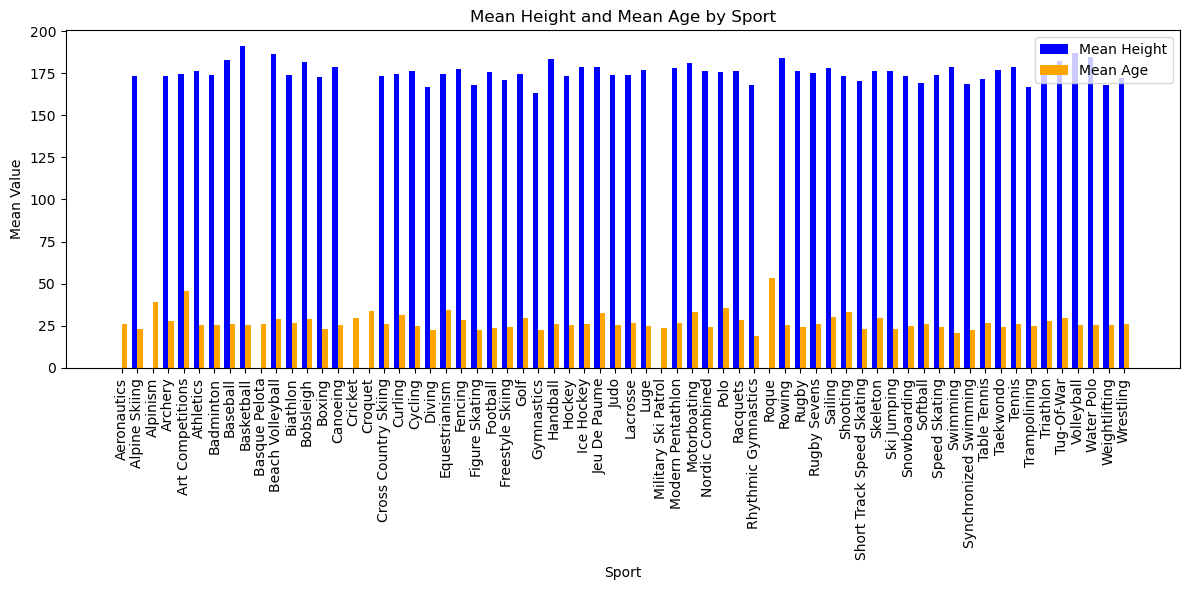

In [72]:
sports = events_df['Sport']
x = np.arange(len(sports))
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, events_df['Mean_Height'], width, label='Mean Height', color='blue')
bar2 = ax.bar(x + width/2, events_df['Mean_age'], width, label='Mean Age', color='orange')
ax.set_xticks(x)
ax.set_xticklabels(sports, rotation=90)
ax.set_xlabel('Sport')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Height and Mean Age by Sport')
ax.legend()
plt.tight_layout()
plt.show()

The cell below creates a histogram of how many participations each event has had. In order to determine the number of bins to use within the plot, an interactive slider widget was created in order to visually determine which number of bins is optimal. In order to run the cell and use the interactive slider, just run the two cells below. The number of bins that resulted in the best distribution of the data was 20 and this was decided visually. 

It can be seen from the histogram that as the number of participations increases the number of events, that have been participated in, decreases. This is expected as the Olympics is the most prestigious event, for most sports, and is extremely difficult to qualify for. Therefore each athlete that is there is specialised for their sport and specific event or events within the sport. Therefore the number of events participated in will go down as the number of participants goes up as events at the Olympics are very specialised for each athlete and is very difficult to qualify for.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
df_athletes = pd.read_csv("./athlete_events.csv")
participation_counts_events = df_athletes.groupby('Event').size().rename('Total_Event_Participations').reset_index()

In [7]:
def create_histogram(bin_size):
    plt.figure(figsize=(10, 6))
    plt.hist(participation_counts_events['Total_Event_Participations'], bins=bin_size, edgecolor='lime',color='grey')
    plt.xlabel('Number of Participants')
    plt.ylabel('Number of Events')
    plt.title('Histogram of the number of Participants for each Event')
    plt.grid(True)

bin_size_slider = widgets.IntSlider(value=10, min=1, max=30, step=1, description='Bins:')
widgets.interactive(create_histogram, bin_size=bin_size_slider)



interactive(children=(IntSlider(value=10, description='Bins:', max=30, min=1), Output()), _dom_classes=('widge…

The cell below creates the histogram with the chosen number of bins. If the plot above does not show, the histogram below is the same

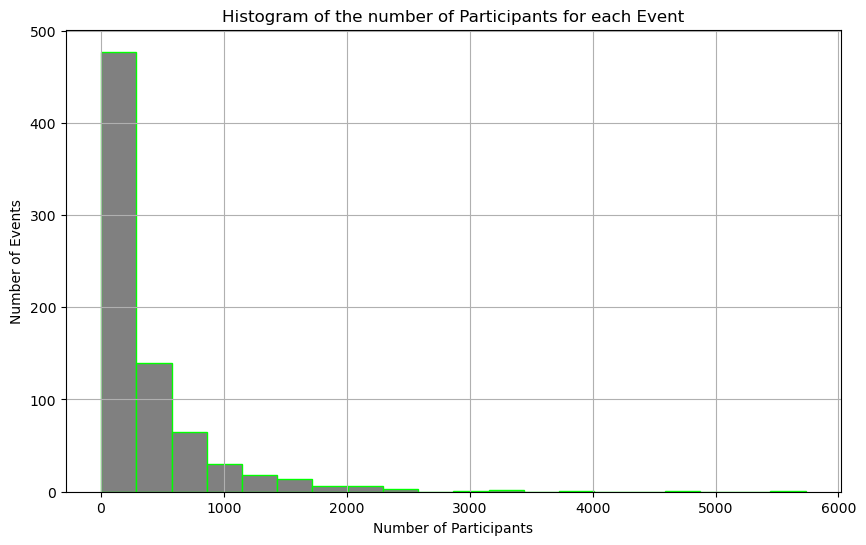

In [62]:
create_histogram(20)

### Question 3.4 (a)

The cell below creates a datapoint for each edition of the Olympic games. For each datapoint, and therefore each edition of the games, columns illustrating the number of total participants, the number of unique sports and the number of unique events.

In [18]:
#Calculating number of participants per games
participants_total_games = df_athletes.groupby(['Year', 'Season'])['Name'].nunique().reset_index()

#Calculating the number of unique sports 
sports_unique_total_games = df_athletes.groupby(['Year', 'Season'])['Sport'].nunique().reset_index()

#Calculating the number of unique events
events_unique_total_games = df_athletes.groupby(['Year', 'Season'])['Event'].nunique().reset_index()


#Merge the separat dataframes
games = participants_total_games.merge(sports_unique_total_games, on=['Year', 'Season'])
games = games.merge(events_unique_total_games, on=['Year', 'Season'])

games.to_csv("games.csv",index=False)



### 3.4 (b)

The cells below plot the different columns created, the number of participants per games, the number of unique sports per games and the number of unique events per games. The data is further separated into either the summer or winter edition of the Olympic games. Separate lines are given per plot to show the difference in these values between the summer and winter editions.

In the plot of the number of total participants for each edtion of the games, summer or winter, it can be seen that the number of participants in the summer edition is and always has been more and has grown much more too. This comes down to a number of factors. Firstly, the events at the winter edition of the Olympics are specialised and many require environments that most countries are not capable of recreating. Therefore to train and prepare for such events becomes very difficult. For example, the recreation of a ski slope is impossible in some countries, just due to their climate and that it does not snow there, and it is difficult to recreate an indoor facility that houses a ski slope. Secondly, many of the training equipment required for the winter games sports are expensive and sometimes infeasible to purchase. Growing up and at a young age, it is difficult to justify the purchase of this equipment, and most of these athletes have been training their entire lives in order to compete at the Olympics. Therefore not starting from a young age will result in many potential athletes just not competing as they were never able to effectively train from a young age. Subsequently, with reference to the plot of unique sports, the summer edition also hosts many more sports, again due to the less strict requirements of location and climate than the winter edition. The many different sports will attract more countries and therefore more participants. Lastly, it can be seen that the summer edition was introduced before the winter edition, almost 30 years, the longer history and tradition of the summer Olympics adds to its popularity and therefore the number of total participants



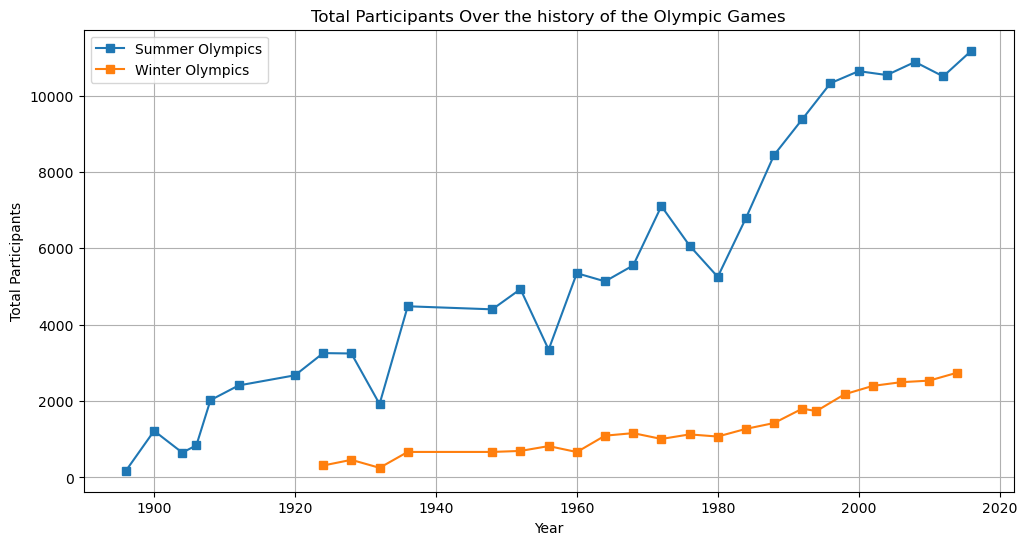

In [171]:
games_df = pd.read_csv("./games.csv")

#Split the data into summer and winter editions
summer_data = games_df[games_df['Season'] == 'Summer']
winter_data = games_df[games_df['Season'] == 'Winter']


#Plots the total number of participants per edtion of the games
plt.figure(figsize=(12, 6))
plt.plot(summer_data['Year'], summer_data['Name'], label='Summer Olympics', marker='s', linestyle='-')
plt.plot(winter_data['Year'], winter_data['Name'], label='Winter Olympics', marker='s', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Participants')
plt.title('Total Participants Over the history of the Olympic Games')
plt.legend()
plt.grid()


plt.show()

It can be seen from the plot below that the number of sports introduced into the summer Olympics is larger than that introduced into the winter Olympics. This comes down to mostly the climate and location that the different edition of the games can be held in. The summer edition is able to be held almost anywhere in the world and within a variety of differing weather climates and geographical locations. However, the winter edition is completely restricted to regions of cold weather where it snows, for events like skiing and snowboarding. Therefore the number of sports that are able to be introduced is much higher for the summer edition as their is no strict requirement of location and specific weather climate, like there is for the winter edition.

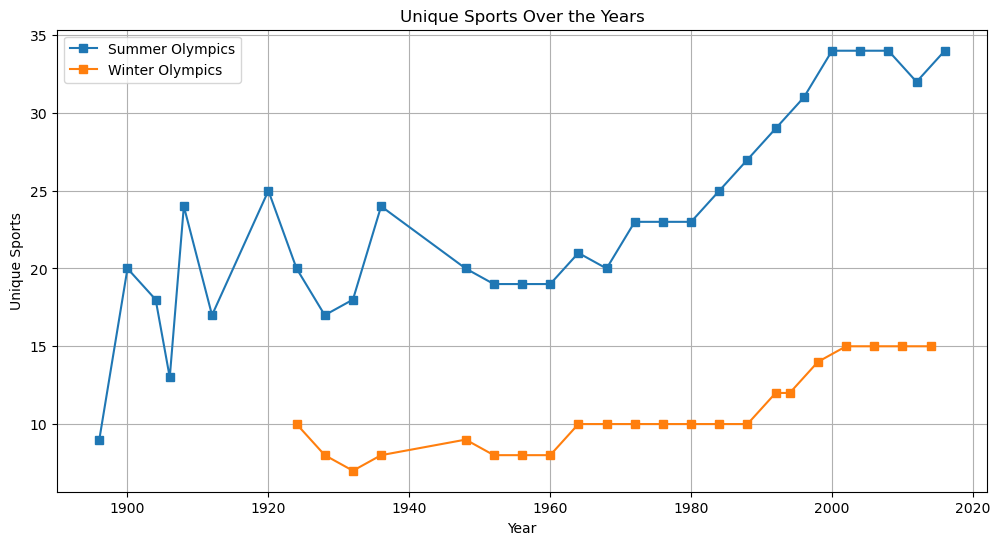

In [24]:
#Plots the total number of unique sports per edtion of the games
plt.figure(figsize=(12, 6))
plt.plot(summer_data['Year'], summer_data['Sport'], label='Summer Olympics', marker='s', linestyle='-')
plt.plot(winter_data['Year'], winter_data['Sport'], label='Winter Olympics', marker='s', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Unique Sports')
plt.title('Unique Sports Over the Years')
plt.legend()
plt.grid()

plt.show()


It can be seen in the plot below of the number of unique events added to the Olympics, that the number of events added to the summer edition of the games is much greater than the winter. Based upon the number of different sports, and that the summer edition contains more unique sports, then clearly the number of events will be more. The large discrepancy can also be affected by the restiction of location and climate of the two editions. The less restrictions on geography and weather, the higher the number of possible events there can be.

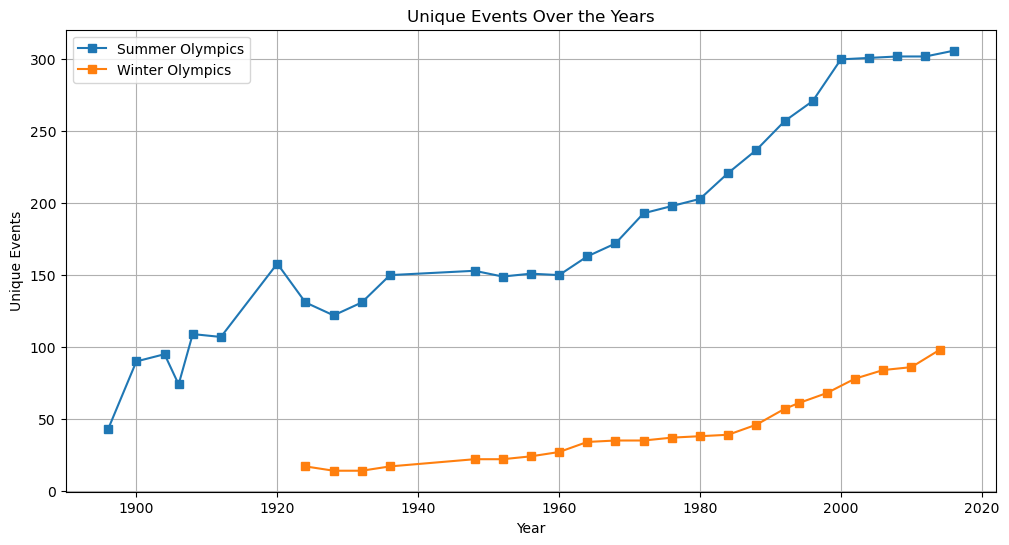

In [23]:

#Plots the total number of unique events per games per edtion of the games
plt.figure(figsize=(12, 6))
plt.plot(summer_data['Year'], summer_data['Event'], label='Summer Olympics', marker='s', linestyle='-')
plt.plot(winter_data['Year'], winter_data['Event'], label='Winter Olympics', marker='s', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Unique Events')
plt.title('Unique Events Over the Years')
plt.legend()
plt.grid()

plt.show()

### Question 3.5

The cells below add meaningful and interesting visualisations

The cell below plots the number of unique sports against the number of unique events for the summer edition of the Olympics. It can be seen, when compared, the number of events becomes much greater than the number of sports. This is intuitve as there will be more events created for each sport than a new sport being created and introduced into the Olympic Games. This can also be seen as the number of sports, throughout the history of the games, has remained relatively constant. Due to the rarity of adding new sports to the Olympics.

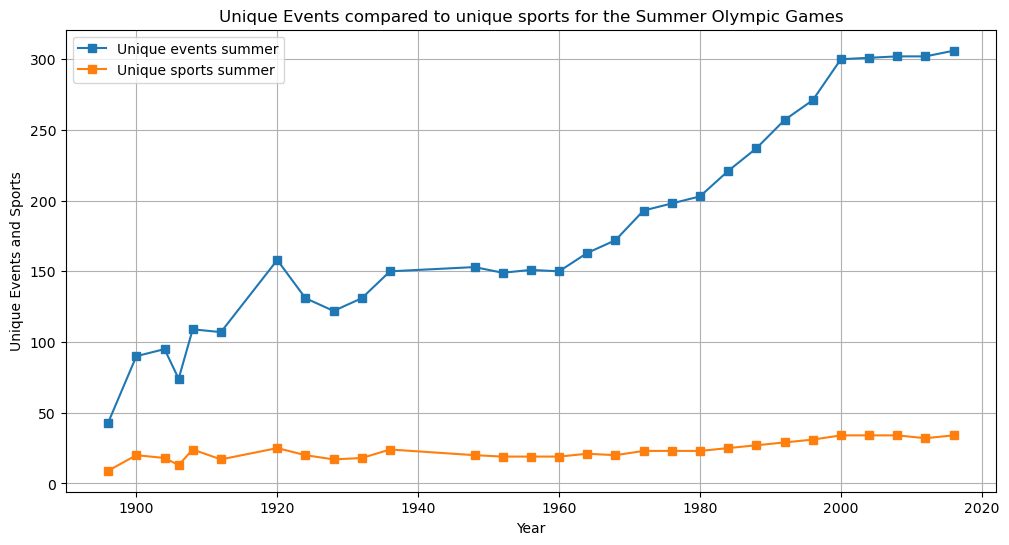

In [173]:
plt.figure(figsize=(12, 6))
plt.plot(summer_data['Year'], summer_data['Event'], label='Unique events summer', marker='s', linestyle='-')
plt.plot(summer_data['Year'], summer_data['Sport'], label='Unique sports summer', marker='s', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Unique Events and Sports')
plt.title('Unique Events compared to unique sports for the Summer Olympic Games')
plt.legend()
plt.grid()

plt.show()

The cell below plots the number of unique sports against the number of unique events for the winter edition of the Olympics. The same can be said for the winter editions as the number of events becomes much greater than the number of sports. This is intuitve as there will be more events created for each sport than a new sport being created and introduced into the Olympics. It can be noted that for a period of time there was not a huge growth of new events and the number of unique events only marginally increased for 60 years, for the summer edition. Until 1980 and then there was an explosion of new unique events being created. The number of unique winter sports has remianed relatively constant throughout the history of the winter Olympic games as with the summer edition of the games. This is again intuitive as the creation and induction of new sports in the Olympics is very rare

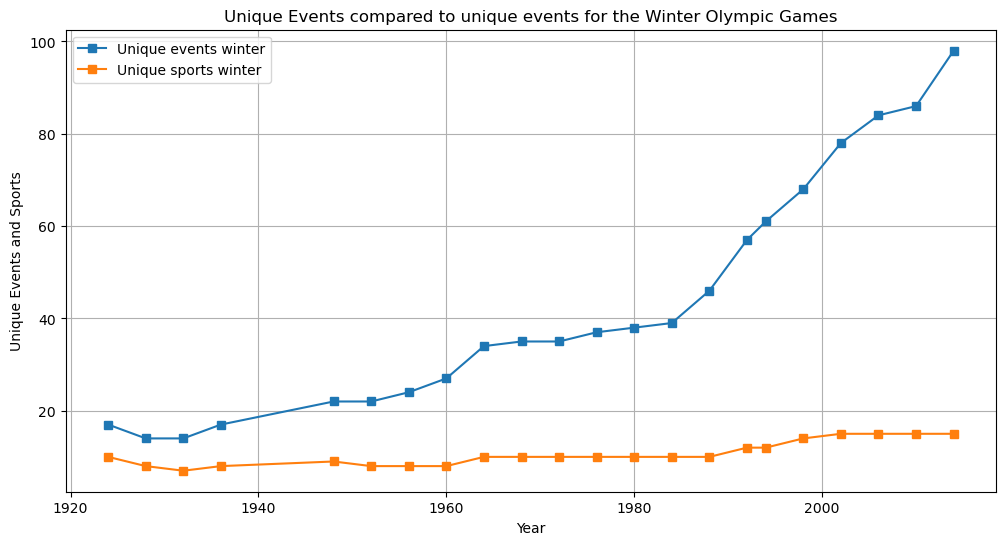

In [172]:

plt.figure(figsize=(12, 6))
plt.plot(winter_data['Year'], winter_data['Event'], label='Unique events winter', marker='s', linestyle='-')
plt.plot(winter_data['Year'], winter_data['Sport'], label='Unique sports winter', marker='s', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Unique Events and Sports')
plt.title('Unique Events compared to unique events for the Winter Olympic Games')
plt.legend()
plt.grid()

plt.show()